In [1]:
# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# ✅ Step 2: Load and Explore the Dataset
df = pd.read_csv("Iris.csv")

In [5]:
# Drop 'Id' column (not needed)
df.drop('Id', axis=1, inplace=True)

In [7]:
# Show first few rows
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# ✅ Step 3: Split into Features and Target
X = df.drop('Species', axis=1)
y = df['Species']

In [11]:
# ✅ Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# ✅ Step 5: Normalize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# ✅ Step 6: Train KNN Classifier (Try K=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
# ✅ Step 7: Predict and Evaluate
y_pred = knn.predict(X_test_scaled)

In [19]:
# Accuracy
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))

Accuracy: 1.0


In [21]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



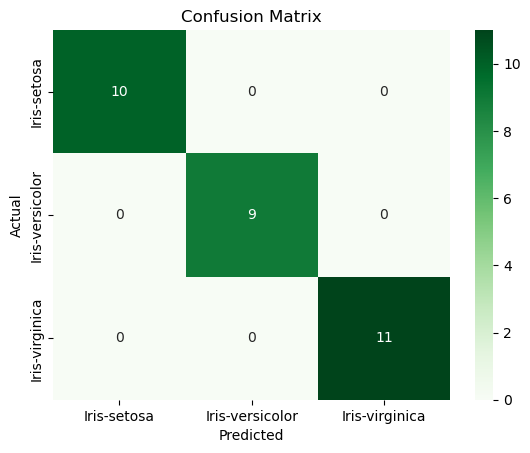

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
# ✅ Step 8: Try Different K Values and Plot Accuracy
k_range = range(1, 21)
accuracies = []

In [27]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

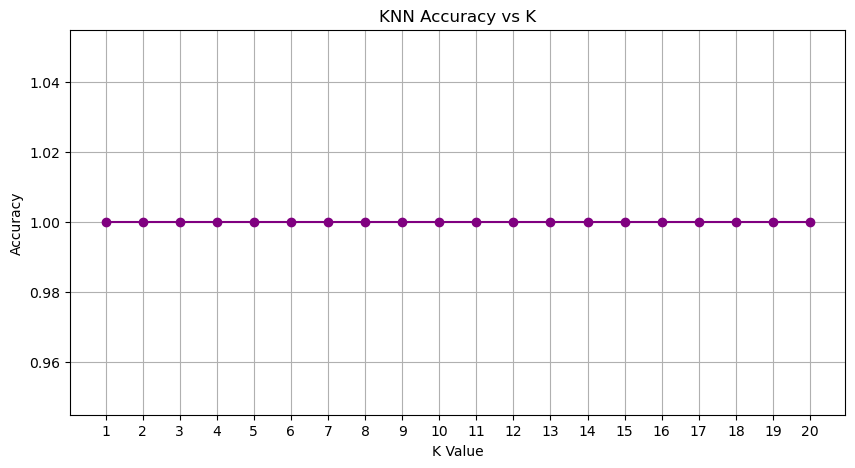

In [29]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o', linestyle='-', color='purple')
plt.title("KNN Accuracy vs K")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [31]:
# ✅ Step 9: Visualize Using PCA (2D) + KNN Boundaries (Optional Bonus)
from sklearn.decomposition import PCA

In [33]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(scaler.fit_transform(X))

In [35]:
# Retrain KNN on PCA-reduced data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_train_r, y_train_r)

KNeighborsClassifier(n_neighbors=3)

In [37]:
# Create mesh grid for decision boundary
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


In [41]:
# Convert string labels to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Re-split and fit using encoded labels for plotting
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y_encoded, test_size=0.2, random_state=42)
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_train_r, y_train_r)

# Now predict and reshape Z with numeric values
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


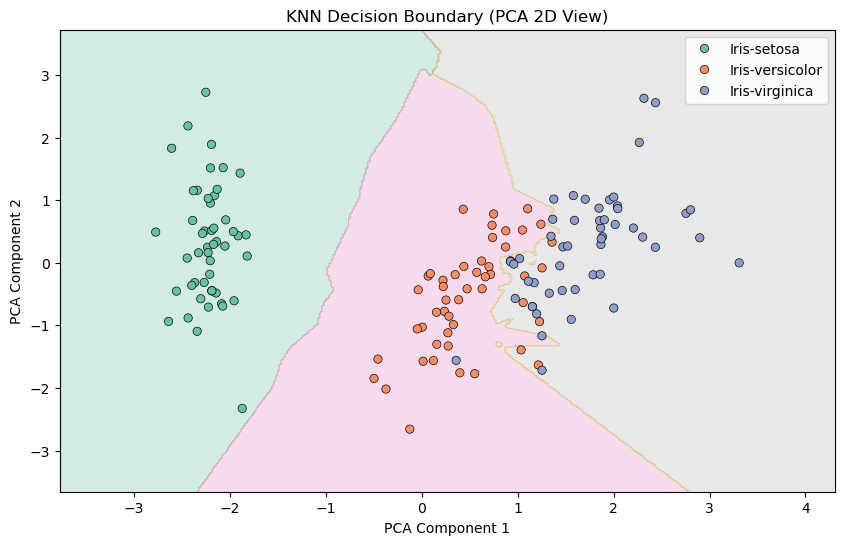

In [43]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set2')
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='Set2', edgecolor='k')
plt.title("KNN Decision Boundary (PCA 2D View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()
